In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
import plotly.express as px

In [ ]:
sns.set(style="whitegrid")

In [ ]:
df = pd.read_excel("/content/Happiness copy.xlsx")


In [ ]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
df.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
df.isnull().sum()

,0
Overall rank,0
Country or region,0
Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0


In [ ]:
df.rename(columns={'Score': 'happiness_score'}, inplace=True)

In [ ]:
df.head( )

,Overall rank,Country or region,happiness_score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


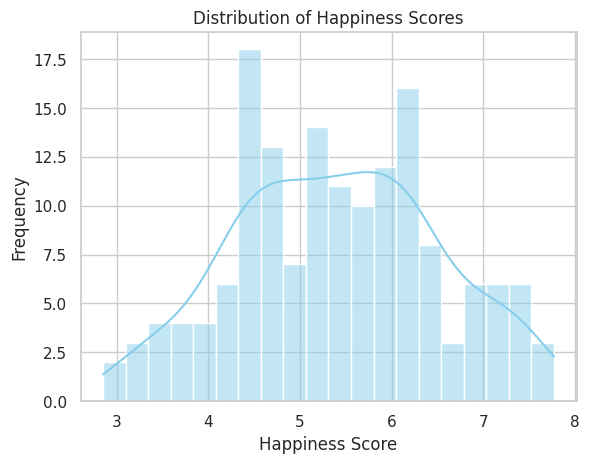

In [ ]:
sns.histplot(df['happiness_score'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Happiness Scores')  # Set title for the plot
plt.xlabel('Happiness Score')  # Label x-axis
plt.ylabel('Frequency')  # Label y-axis
plt.show()  # Display the plot

Index(['Overall rank', 'Country or region', 'happiness_score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


<ipython-input-26-07bacf258003>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country or region', x='happiness_score', data=df, palette='viridis')


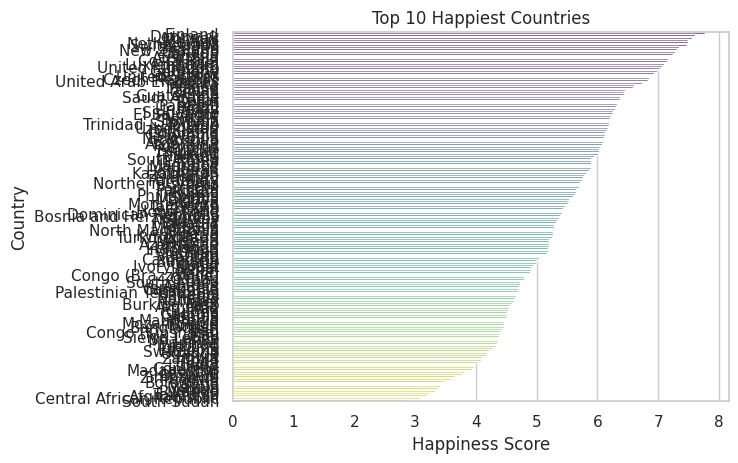

In [ ]:

print(df.columns)


sns.barplot(y='Country or region', x='happiness_score', data=df, palette='viridis')
plt.title('Top 10 Happiest Countries')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

<ipython-input-28-5a616960e1d8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country or region', x='happiness_score', data=hap, palette='viridis')


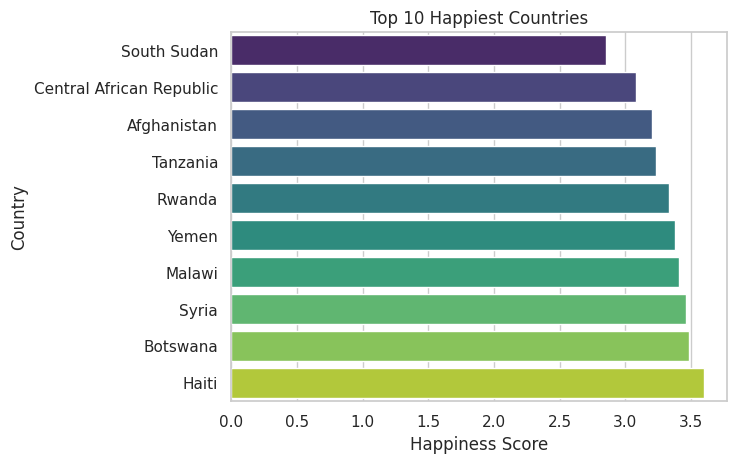

In [ ]:
hap=df.sort_values('happiness_score', ascending=True).head(10)
sns.barplot(y='Country or region', x='happiness_score', data=hap, palette='viridis')
plt.title('Top 10 Happiest Countries')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

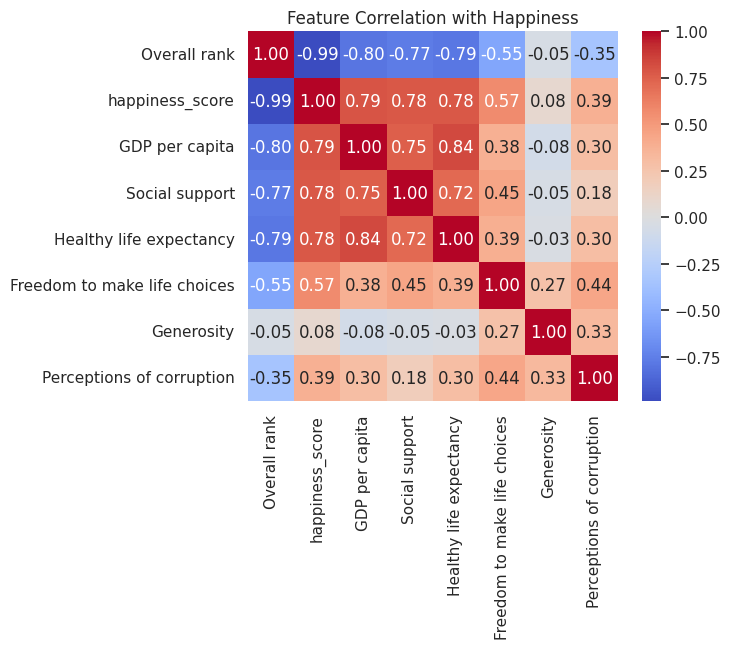

In [ ]:
corr = df.corr(numeric_only=True)


sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Feature Correlation with Happiness')  # Set title for heatmap
plt.show()

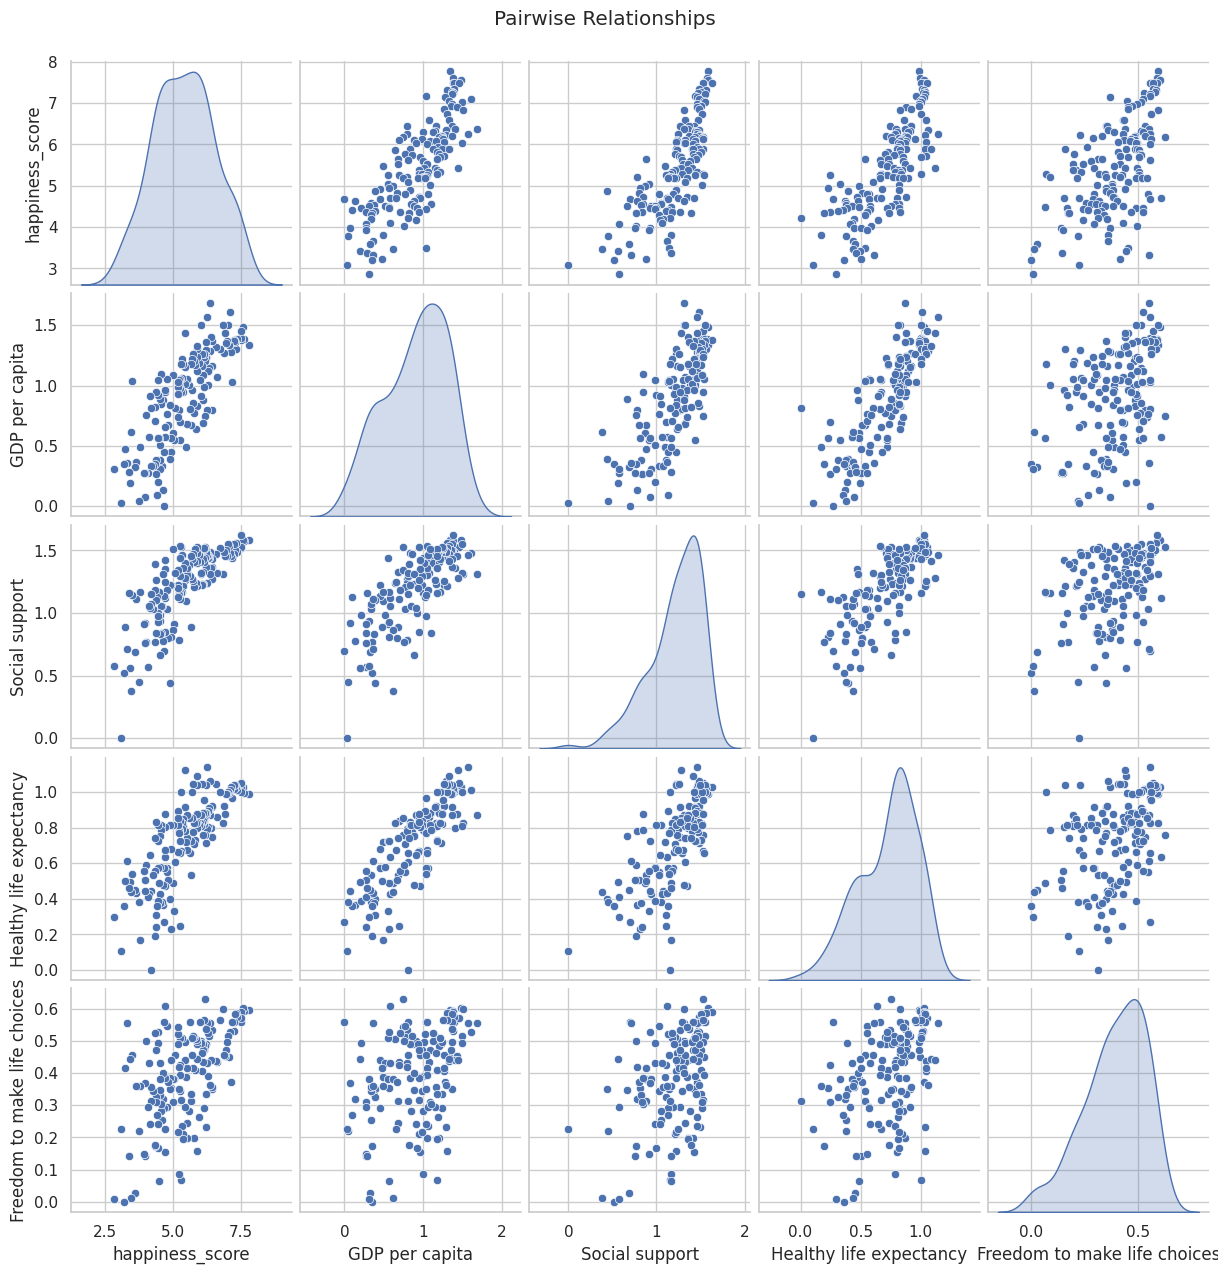

In [ ]:
sns.pairplot(df[['happiness_score', 'GDP per capita', 'Social support',
                 'Healthy life expectancy', 'Freedom to make life choices']],
             diag_kind='kde')

plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

In [ ]:

fig = px.choropleth(df,
                    locations="Country or region",  # Corrected column name
                    locationmode="country names",   # Match locations by country names (not ISO codes)
                    color="happiness_score",        # Column used to color map regions (happiness score)
                    color_continuous_scale="viridis",   # Color scale used for visualization (viridis palette)
                    title="World Happiness Scores")     # Title of the map

fig.show()